# Libraries

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Creating dataset

In [245]:
data = load_digits()
X = data.data
y = data.target
print(X.shape)

(1797, 64)


In [246]:
noise = np.random.normal(0,1,(1797,64))
print(noise)

[[ 1.55862325  0.39738512 -1.43167383 ...  0.18501518  0.20726308
   1.48846158]
 [ 0.15425689  0.54293591  0.37019192 ... -0.37994627 -0.3477977
   0.8182163 ]
 [ 0.1024859   1.2292571   0.29902806 ...  0.50447855  2.07548676
  -0.45891694]
 ...
 [-1.50225468 -0.22765932 -3.21673657 ...  0.13183623  0.07104545
  -0.41794237]
 [-0.5486222  -0.0653705  -0.31687017 ... -0.96351655 -0.1750474
  -0.48056637]
 [ 1.60132289 -0.36940186 -1.46666957 ... -0.62168829 -2.28780645
  -0.17232997]]


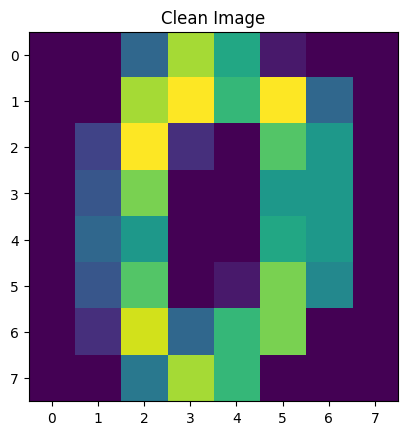

In [247]:
plt.imshow(X[0].reshape(8,8))
plt.title('Clean Image')
plt.show()

In [248]:
X_noisy = X + noise
print(X_noisy)

[[ 1.55862325  0.39738512  3.56832617 ...  0.18501518  0.20726308
   1.48846158]
 [ 0.15425689  0.54293591  0.37019192 ...  9.62005373 -0.3477977
   0.8182163 ]
 [ 0.1024859   1.2292571   0.29902806 ... 16.50447855 11.07548676
  -0.45891694]
 ...
 [-1.50225468 -0.22765932 -2.21673657 ...  6.13183623  0.07104545
  -0.41794237]
 [-0.5486222  -0.0653705   1.68312983 ... 11.03648345 -0.1750474
  -0.48056637]
 [ 1.60132289 -0.36940186  8.53333043 ... 11.37831171 -1.28780645
  -0.17232997]]


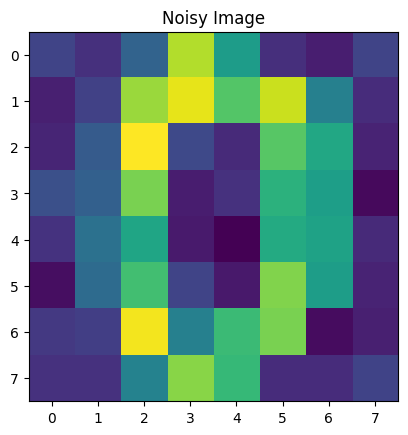

In [249]:
plt.imshow(X_noisy[0].reshape(8,8))
plt.title('Noisy Image')
plt.show()

# KMeans Clustering

In [250]:
model = KMeans(n_clusters=10,n_init='auto',init = 'k-means++')
model.fit(X)
pred_labels = model.predict(X_noisy)

In [251]:
print('Confusion Matrix:')
print(confusion_matrix(y,pred_labels))
print('Accuracy Score:',accuracy_score(y,pred_labels))

Confusion Matrix:
[[  0   0   0   0   0 176   0   0   2   0]
 [  0   2   0  53   1   0 101  25   0   0]
 [  2   0  11   2   0   1   3 146   0  12]
 [  8   0 160   0   2   0   0   3   0  10]
 [  8   0   0   4   0   0   5   0 162   2]
 [  0   2  40   0 138   0   0   0   2   0]
 [  0 176   0   0   0   1   3   0   0   1]
 [173   0   0   2   0   0   0   0   0   4]
 [  2   1  13   7   4   0  13   3   0 131]
 [  7   0 145  20   6   0   0   0   0   2]]
Accuracy Score: 0.01001669449081803


# PCA followed by KMeans Clustering

In [252]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_noisy_scaled = scaler.fit_transform(X_noisy)

model = PCA(n_components=2)
arr = model.fit_transform(X_scaled)
arr1 = model.fit_transform(X_noisy_scaled)

In [253]:
model = KMeans(n_clusters=10,n_init='auto',init = 'k-means++')
model.fit(arr)
pred_labels = model.predict(arr1)

In [254]:
print('Confusion Matrix:')
print(confusion_matrix(y,pred_labels))
print('Accuracy Score:',accuracy_score(y,pred_labels))

Confusion Matrix:
[[115   1   0  53   3   0   0   5   1   0]
 [  2  27  16   1  76   0   0   0  57   3]
 [  0  37   1   0   8  99  21   0  11   0]
 [  4  48  12   0   0  46  64   0   9   0]
 [  2   0   1   0  20   0   2 152   0   4]
 [  7  40  11   0  14   1  50   1  58   0]
 [ 37   0   0 143   1   0   0   0   0   0]
 [  0   0 117   0  12   0  10   0   8  32]
 [  5  33  11   0  27   1  21   0  76   0]
 [  3  84  10   0   6   6  11   0  43  17]]
Accuracy Score: 0.14301613800779076
